In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md
import os
os.chdir('/home/ch3859/comp-class/comp-lab-class/Week2/Analysis/')

In [2]:
# read in the md trajectory of beta amyloid
traj = md.load_xtc('../Data/1hz3_T310.stepid25000000.every100ps.nowater.xtc', top='../Data/1hz3_T310.start.nowater.gro')

In [3]:
# compute the end-end distance at each time
last_idx = traj.xyz.shape[1] - 1
end_end_dist = md.compute_distances(traj, [[0, last_idx]], periodic=False).reshape(-1)
end_end_dist

array([2.4080002, 2.294153 , 2.4405324, 2.3514538, 2.8238873, 3.389765 ,
       2.9046328, 2.9567354, 3.0590065, 4.125036 , 3.451251 , 3.3695395,
       2.1477714, 2.0729964, 2.562689 , 2.211393 , 2.233543 ],
      dtype=float32)

In [4]:
# compute the radius of gyration at each time
rg = md.compute_rg(traj)
rg

array([0.85057444, 1.00091706, 1.00509146, 0.9700538 , 1.03096215,
       1.08965024, 1.06154491, 1.01728751, 1.0467843 , 1.25890696,
       1.03388204, 1.18969875, 1.03686539, 1.03002704, 1.00622438,
       1.02566947, 1.03948413])

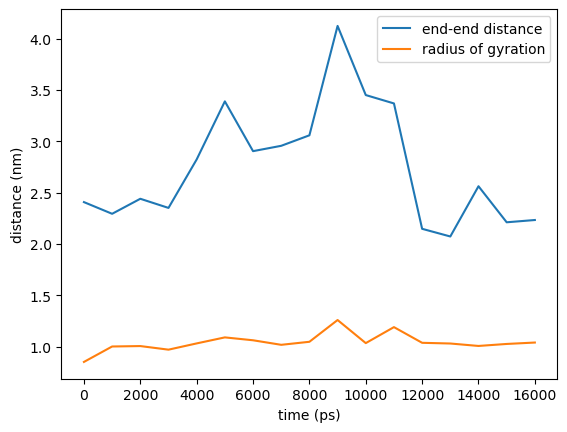

In [5]:
# plot the end-end distance and radius of gyration vs time on the same plot, clearly labeled
plt.plot(traj.time, end_end_dist, label='end-end distance')
plt.plot(traj.time, rg, label='radius of gyration')
plt.xlabel('time (ps)')
plt.ylabel('distance (nm)')
plt.legend()
plt.savefig('../Figures/1hz3_end-end_dist_and_rg_vs_time.pdf', bbox_inches="tight")
plt.show()

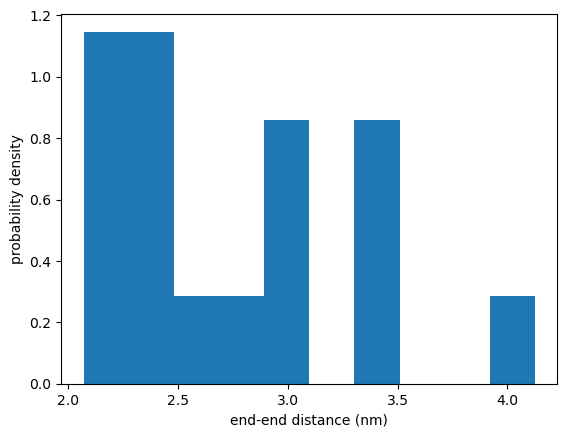

In [6]:
# plot a normalized histogram of end-end distance
plt.hist(end_end_dist, bins=10, density=True)
plt.xlabel('end-end distance (nm)')
plt.ylabel('probability density')
plt.savefig('../Figures/1hz3_end-end_dist_normed_hist.pdf', bbox_inches="tight")
plt.show()

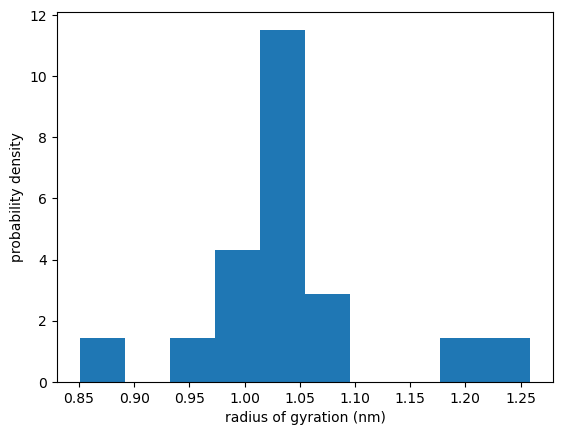

In [7]:
# plot a normalized histogram of radius of gyration
plt.hist(rg, bins=10, density=True)
plt.xlabel('radius of gyration (nm)')
plt.ylabel('probability density')
plt.savefig('../Figures/1hz3_rg_normed_hist.pdf', bbox_inches="tight")
plt.show()